# Dhruv Shah and Siddharth Mody

In [1]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's load our datasets, train and test. 
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Target column we're predicting. 
target_column = 'Target_Status'

In [4]:
# Quick cleanup, we're making sure 'approved' status in Drug_high_status is consistent across both datasets.
df['Drug_high_status'] = df['Drug_high_status'].replace({'approved': 'Approved'})
test['Drug_high_status'] = test['Drug_high_status'].replace({'approved': 'Approved'})

In [5]:
# separate our target (y) from the features (X) because that's what we are predicting.
X = df.drop(columns=[target_column])
y = df[target_column]

In [6]:
X.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303


In [7]:
X.isnull().sum()

ID                           0
TargetID                     0
DRUGID                       0
DRUGTYPE                     0
Drug_high_status             0
DRUGNAME                     0
PUBCHCID                     0
Disease_of_highest_status    0
Drug_Status                  0
UNIPROID                     0
TARGNAME                     0
GENENAME                     0
SYNONYMS                     0
FUNCTION                     0
BIOCLASS                     0
SEQUENCE                     0
Disease                      0
Accession Number             0
dtype: int64

In [8]:
X.nunique()

ID                           134486
TargetID                        701
DRUGID                         2443
DRUGTYPE                          6
Drug_high_status                 28
DRUGNAME                       2443
PUBCHCID                       2443
Disease_of_highest_status       674
Drug_Status                      27
UNIPROID                        698
TARGNAME                        701
GENENAME                        700
SYNONYMS                        701
FUNCTION                        684
BIOCLASS                        102
SEQUENCE                        698
Disease                         589
Accession Number                692
dtype: int64

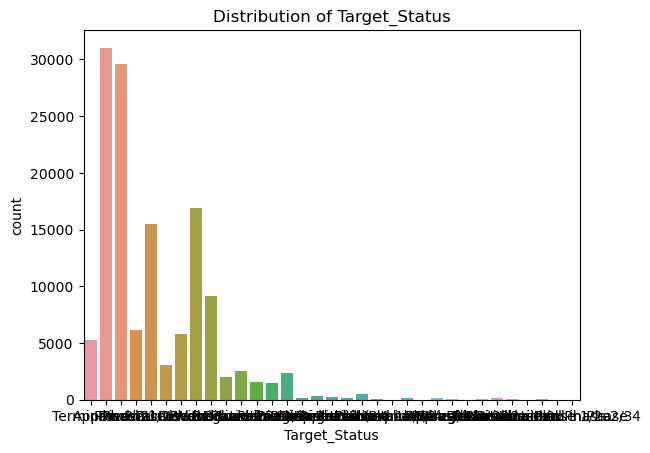

In [10]:
sns.countplot(x=y)
plt.title("Distribution of Target_Status")
plt.show()

In [17]:
# label encode our target variable 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
print("Encoded Target Values:")
print(y_encoded[:10])  # Just printing the first 10 encoded values

Encoded Target Values:
[31  1  1 22  1 18  1 22  1 26]


In [19]:
# identify all the categorical columns that we'll need to encode.
# (Excluding 'DRUGTYPE' for now ) remember later !!!!
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'DRUGTYPE']
print(f"Categorical columns to encode: {categorical_cols}")

Categorical columns to encode: ['TargetID', 'DRUGID', 'Drug_high_status', 'DRUGNAME', 'Disease_of_highest_status', 'Drug_Status', 'UNIPROID', 'TARGNAME', 'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE', 'Disease', 'Accession Number']


In [20]:
target_encoder = ce.TargetEncoder(cols=categorical_cols)
X_train_encoded = target_encoder.fit_transform(X, y_encoded)
X_test_encoded = target_encoder.transform(test)

In [21]:
#only 6 unique values ?? OHE
X_train_encoded = pd.get_dummies(X_train_encoded, columns=['DRUGTYPE'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_encoded, columns=['DRUGTYPE'], drop_first=True)

In [22]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [23]:
X_train_encoded.dtypes

ID                                                    int64
TargetID                                            float64
DRUGID                                              float64
Drug_high_status                                    float64
DRUGNAME                                            float64
PUBCHCID                                              int64
Disease_of_highest_status                           float64
Drug_Status                                         float64
UNIPROID                                            float64
TARGNAME                                            float64
GENENAME                                            float64
SYNONYMS                                            float64
FUNCTION                                            float64
BIOCLASS                                            float64
SEQUENCE                                            float64
Disease                                             float64
Accession Number                        

In [24]:
#best f1 using xgboost? (no logistic no rf?)
import xgboost as xgb

In [25]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_encoded, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_pred_xgb = xgb_model.predict(X_test_encoded)

In [27]:
#restore string values for final csv
y_pred_original = le.inverse_transform(y_pred_xgb)

In [28]:
final_sub = pd.DataFrame({"ID": X_test_encoded.index, "Target_Status": y_pred_original})

In [30]:
final_sub.to_csv("hackathon15.csv", index=False)

In [31]:
final_sub.head()

,ID,Target_Status
0,0,Approved
1,1,Phase 3
2,2,Phase 3
3,3,Approved
4,4,Phase 1/2
